# Init

In [ ]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from math import atan, sin, cos
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

#  Main


## Base_Init

In [ ]:
def generate_x(a, b, n):
    h = (b - a) / n
    result = []
    for i in range(n + 1):
        result.append(a + h * i)
    x = np.array(result)
    return x

def y_function(x):
    return x * np.sin(3*x) 

In [ ]:
a = -10
b = 5
n = 30
x = generate_x(a,b,n)

## Lagrange 

In [ ]:
class Lagrange:
    def __init__(self):
        pass

    def polinom(self, x, y):
        x_count = x.shape[0]
        L = Polynomial([0], [-1, 1], [-1, 1])
        cache = []
        base = np.eye(x_count)
        for i, curr_x in enumerate(x):
            cache.append(Polynomial([-curr_x, 1], [-1, 1], [-1, 1]))
            for j, curr_x_2 in enumerate(x):
                if i == j:
                    continue
                base[i, j] = curr_x - curr_x_2
        for i, curr_x in enumerate(x):
            # if i == x_count - 1:
            #     return L
            bot = np.prod(base[i, :])
            temp = y[i] / bot
            for j in range(x_count):
                if i == j:
                    continue
                temp *= cache[j]
            L += temp
        return L

In [ ]:
lagrange = Lagrange()
L = lagrange.polinom(x, y_function(x))
L

Polynomial([ 0.00000000e+00, -3.40375745e-04,  2.99956885e+00,  1.87224537e-03,
       -4.49740109e+00, -2.13348237e-03,  2.02090393e+00,  2.11330325e-04,
       -4.31358907e-01,  6.92111940e-04,  5.35242681e-02, -3.77410996e-04,
       -4.36728688e-03,  8.42233618e-05,  2.63014450e-04, -9.01066226e-06,
       -1.33524299e-05,  3.55931767e-07,  5.92974676e-07,  1.47413704e-08,
       -1.89737249e-08, -1.95847037e-09,  2.73728180e-10,  6.55260505e-11,
        2.42819198e-12, -5.72406208e-13, -8.63950459e-14, -5.35579703e-15,
       -1.57594940e-16, -1.34882727e-18,  1.96683274e-20], domain=[-1.,  1.], window=[-1.,  1.])

## Newton

In [ ]:
class Newton:
    def __init__(self):
        pass
        
    def polinom(self, x, y):
        x_count = x.shape[0]
        div_diffs = np.zeros((x_count, x_count))
        div_diffs[:, 0] = y
        for j in range(1, x_count):
            for i in range(x_count - j):
                div_diffs[i, j] = (div_diffs[i + 1, j - 1] - div_diffs[i, j - 1]) / (x[i + j] - x[i])
        N = div_diffs[0, 0]
        for i in range(1, x_count):
            temp = div_diffs[0, i]
            for j in range(i):
                temp *= Polynomial([-x[j], 1])
            N += temp
        return N

In [ ]:
newton = Newton()
N = newton.polinom(x, y_function(x))
N

Polynomial([ 8.11451173e-09, -3.40356095e-04,  2.99956887e+00,  1.87224245e-03,
       -4.49740109e+00, -2.13348273e-03,  2.02090393e+00,  2.11330335e-04,
       -4.31358907e-01,  6.92111938e-04,  5.35242681e-02, -3.77410996e-04,
       -4.36728688e-03,  8.42233619e-05,  2.63014450e-04, -9.01066224e-06,
       -1.33524299e-05,  3.55931767e-07,  5.92974676e-07,  1.47413704e-08,
       -1.89737249e-08, -1.95847037e-09,  2.73728180e-10,  6.55260505e-11,
        2.42819198e-12, -5.72406208e-13, -8.63950459e-14, -5.35579703e-15,
       -1.57594940e-16, -1.34882727e-18,  1.96683274e-20], domain=[-1.,  1.], window=[-1.,  1.])

## CubicSpline

In [ ]:
class CubicSpline:
    def __init__(self, x, funcs):
        self.ranges = x
        self.funcs = funcs

    def __call__(self, value):
        for i, r in enumerate(self.ranges):
            if r > value:
                return self.funcs[i - 1](value)
                
def thomas_tridiagonal(matrix, f):
    size = matrix.shape[0]

    c = -np.diag(matrix)
    a = np.diag(matrix, k=-1)
    b = np.diag(matrix, k=1)
    alpha_i = b[0] / c[0]

    beta_i = -f[0] / c[0]
    alpha = [alpha_i]
    beta = [beta_i]

    x = np.zeros(size)
    for i in range(1, size - 1):
        z_i = c[i] - alpha_i * a[i - 1]

        beta_i = (-f[i] + a[i - 1] * beta_i) / z_i
        beta.append(beta_i)

        alpha_i = b[i] / z_i
        alpha.append(alpha_i)

    z_i = c[-1] - alpha_i * a[-1]

    x[-1] = (-f[-1] + a[-1] * beta_i) / z_i
    for i in range(size - 2, -1, -1):
        x[i] = x[i + 1] * alpha[i] + beta[i]
    return x

def cubic_spline(x, y, h):
    x_count = x.shape[0] - 1
    A_shape = (x_count - 1, x_count - 1)
    A = np.zeros(A_shape)
    A += np.diag([(2 * h) / 3] * (x_count - 1))
    ul_diags = [h / 6] * (x_count - 2)
    A += np.diag(ul_diags, -1)
    A += np.diag(ul_diags, 1)
    H_shape = (x_count - 1, x_count + 1)
    H = np.zeros(H_shape)
    H[:, :x_count - 1] += np.diag([1 / h] * (x_count - 1))
    H[:, 1:x_count] += np.diag([-2 / h] * (x_count - 1))
    H[:, 2:x_count + 1] += np.diag([1 / h] * (x_count - 1))
    f = H @ y.T
    m = thomas_tridiagonal(A, f)
    M = np.zeros(x_count + 1)
    M[1:-1] = m
    result = CubicSpline(np.zeros(x_count), [])
    result.ranges = x.copy()
    for i, curr_x in enumerate(x):
        if i == 0:
            continue
        a = y[i]
        d = (M[i] - M[i - 1]) / h
        b = (h / 2 * M[i] - h * h / 6 * d + (y[i] - y[i - 1]) / h)
        d_x = Polynomial([-curr_x, 1])
        s = a + b * d_x + M[i] / 2 * d_x ** 2 + d / 6 * d_x ** 3
        result.funcs.append(s)
    return result

In [ ]:
S = cubic_spline(x, y_function(x), (b - a) / n)
step = 0.1
border = 0
D = np.arange(a - border, b + border + step, step)
spline_D = np.arange(a, b + step, step)

spline_result = []
for x_i in spline_D:
    spline_result.append(S(x_i))
S.funcs

[Polynomial([1.46393080e+04, 4.37100314e+03, 4.35912647e+02, 1.45304216e+01], domain=[-1.,  1.], window=[-1.,  1.]),
 Polynomial([-39679.8010722 , -12782.3997091 ,  -1369.70870553,    -48.82471361], domain=[-1.,  1.], window=[-1.,  1.]),
 Polynomial([15329.19609889,  5553.93268126,   667.66156007,    26.63344438], domain=[-1.,  1.], window=[-1.,  1.]),
 Polynomial([20263.8142413 ,  7295.56261388,   872.5591992 ,    34.66864591], domain=[-1.,  1.], window=[-1.,  1.]),
 Polynomial([-5821.18379563, -2486.31164997,  -350.17508378,   -16.27861588], domain=[-1.,  1.], window=[-1.,  1.]),
 Polynomial([-13000.8432677 ,  -5358.1754388 ,   -733.09025563,    -33.29706796], domain=[-1.,  1.], window=[-1.,  1.]),
 Polynomial([2077.259941  , 1103.8687935 ,  190.05892042,   10.66241661], domain=[-1.,  1.], window=[-1.,  1.]),
 Polynomial([7367.0854309 , 3545.32671192,  565.66783094,   29.92441202], domain=[-1.,  1.], window=[-1.,  1.]),
 Polynomial([-376.3772646 , -326.40463583,  -79.62072702,   -5.9

## Plotting

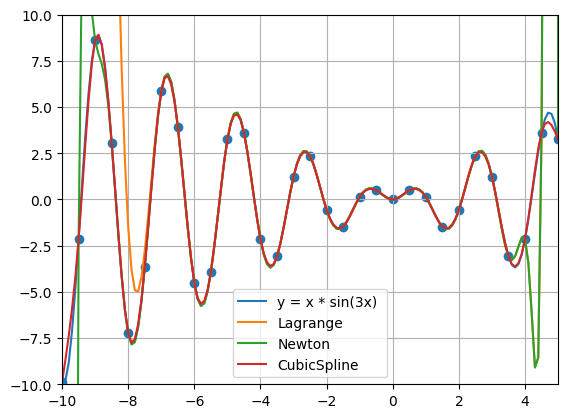

In [298]:
plt.scatter(x, y_function(x))
y, = plt.plot(D, y_function(D))
l_polinom, = plt.plot(D, L(D))
n_polinom, = plt.plot(D, N(D))
spline, = plt.plot(spline_D, spline_result)

y.set_label("y = x * sin(3x) ")
l_polinom.set_label("Lagrange")
n_polinom.set_label("Newton")
spline.set_label("CubicSpline")

plt.grid(visible=True)
plt.xlim(-10,  5)
plt.ylim(-10, 10)

plt.legend()
plt.show()